# Zonally Averaged Overturning Circulation

This notebook shows a simple example of calculation the zonally averaged global meridional overturning circulation - in density space.

**Firstly,** load in the requisite libraries:

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np

netcdf_index loaded.


**Next,** choose an experiment. This can be any resolution, and can be with or without Gent-McWilliams eddy parameterisation:

In [2]:
expt = '1deg_jra55v13_ryf9091_spinup_A'

Load up ```ty_trans_rho``` from ```ocean.nc```.
Also, if there is a ```ty_trans_rho_gm``` variable saved, assume that GM is switched on and load that as well.

In [3]:
psi = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho',chunks={'potrho': None}, n=10)
psi = psi.sum('grid_xt_ocean')

varlist = cc.get_variables(expt, 'ocean.nc')
if 'ty_trans_rho_gm' in varlist:
    GM = True
    psiGM = cc.get_nc_variable(expt, 'ocean.nc', 'ty_trans_rho_gm',chunks={'potrho': None}, n=10)
    psiGM = psiGM.sum('grid_xt_ocean')
else:
    GM = False

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=10), HTML(value='')))

/g/data1/v45/pas561/cosima-cookbook/cosima_cookbook/netcdf_index.py:368: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  decoded_time = xr.conventions.decode_cf_datetime(dataarray.time, time_units)


HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=10), HTML(value='')))

In [4]:
# assume units of kg/s, convert to Sv.
psi = psi*1.0e-9
if GM:
    psiGM = psiGM*1.0e-9

In [5]:
psi_avg = psi.cumsum('potrho').mean('time') - psi.sum('potrho').mean('time')
if GM:
    psi_avg = psi_avg + psiGM.mean('time')

psi_avg.compute()

<xarray.DataArray (potrho: 80, grid_yu_ocean: 300)>
array([[ 0.      ,  0.005098,  0.010814, ..., -0.009619, -0.014259, -0.00186 ],
       [ 0.      ,  0.005098,  0.010814, ..., -0.013451, -0.013428, -0.001853],
       [ 0.      ,  0.005098,  0.010814, ..., -0.014252, -0.013831, -0.001816],
       ..., 
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,  0.      ]])
Coordinates:
  * grid_yu_ocean  (grid_yu_ocean) float64 -77.75 -77.51 -77.26 -77.01 ...
  * potrho         (potrho) float64 1.028e+03 1.028e+03 1.028e+03 1.028e+03 ...

Text(0.5,1,'Overturning in 1deg_jra55v13_ryf9091_spinup_A')

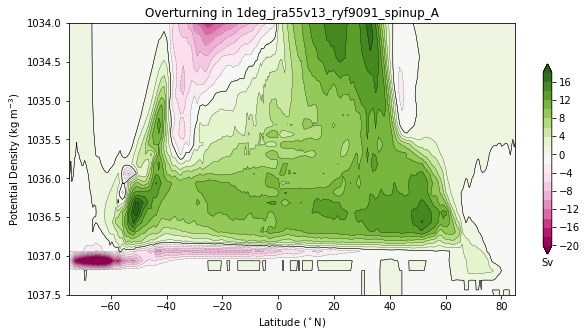

In [ ]:
plt.figure(figsize=(10, 5)) 
clev = np.arange(-20,20,2)
plt.contourf(psi_avg.grid_yu_ocean,psi_avg.potrho, psi_avg,cmap=plt.cm.PiYG,levels=clev,extend='both')
cb=plt.colorbar(orientation='vertical', shrink = 0.7)
    
cb.ax.set_xlabel('Sv')
plt.contour(psi_avg.grid_yu_ocean, psi_avg.potrho, psi_avg, levels=clev, colors='k', linewidths=0.25)
plt.contour(psi_avg.grid_yu_ocean, psi_avg.potrho, psi_avg, levels=[0.0,], colors='k', linewidths=0.5)
plt.gca().invert_yaxis()
    
plt.ylim((1037.5,1034))
plt.ylabel('Potential Density (kg m$^{-3}$)')
plt.xlabel('Latitude ($^\circ$N)')
plt.xlim([-75,85])
plt.title('Overturning in %s' % expt)

**Finally,** this is all encoded in a script for Paul's convenience:

In [ ]:
cc.plots.psi_avg(expt, 5)

HBox(children=(IntProgress(value=0, description='experiments', max=1), HTML(value='')))

HBox(children=(IntProgress(value=0, description='get_nc_variable:', max=5), HTML(value='')))